In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import data_processing
import math
import ipympl
from scipy import stats
from numpy import NaN
from matplotlib.pyplot import box
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
%matplotlib widget

In [3]:
jordyn_waveform_wo = np.loadtxt('jordyn_waveforms_wo.txt')
jordyn_correct_wo = np.loadtxt('jordyn_correctness_wo.txt')
jordyn_ID_wo = np.loadtxt('jordyn_ID_wo.txt')
jordyn_waveform_haptics = np.loadtxt('jordyn_waveforms_haptics.txt')
jordyn_correct_haptics = np.loadtxt('jordyn_correctness_haptics.txt')
jordyn_ID_haptics = np.loadtxt('jordyn_ID_haptics.txt')


kriti_waveform_wo = np.loadtxt('kriti_waveforms_wo.txt')
kriti_correct_wo = np.loadtxt('kriti_correctness_wo.txt')
kriti_ID_wo = np.loadtxt('kriti_ID_wo.txt')
kriti_waveform_haptics = np.loadtxt('kriti_waveforms_haptics.txt')
kriti_correct_haptics = np.loadtxt('kriti_correctness_haptics.txt')
kriti_ID_haptics = np.loadtxt('kriti_ID_haptics.txt')

dailyn_waveform_wo = np.loadtxt('dailyn_waveforms_wo.txt')
dailyn_correct_wo = np.loadtxt('dailyn_correctness_wo.txt')
dailyn_ID_wo = np.loadtxt('dailyn_ID_wo.txt')
dailyn_waveform_haptics = np.loadtxt('dailyn_waveforms_haptics.txt')
dailyn_correct_haptics = np.loadtxt('dailyn_correctness_haptics.txt')
dailyn_ID_haptics = np.loadtxt('dailyn_ID_haptics.txt')

In [4]:
np.shape(dailyn_waveform_haptics)

(674, 5000)

In [5]:
waveforms_wo = np.concatenate([jordyn_waveform_wo/234.7768905, kriti_waveform_wo/312.23, dailyn_waveform_wo/346.0])
correct_wo = np.concatenate([jordyn_correct_wo, kriti_correct_wo, dailyn_correct_wo])
ID_wo = np.concatenate([np.repeat(jordyn_ID_wo, 25), np.repeat(kriti_ID_wo, 25), np.repeat(dailyn_ID_wo, 25)])

waveforms_haptics =  np.concatenate([jordyn_waveform_haptics/234.7768905, kriti_waveform_haptics/312.23, dailyn_waveform_haptics/346.0])
correct_haptics = np.concatenate([jordyn_correct_haptics, kriti_correct_haptics, dailyn_correct_haptics])
ID_haptics = np.concatenate([np.repeat(jordyn_ID_haptics, 25), np.repeat(kriti_ID_haptics, 25), np.repeat(dailyn_ID_haptics, 25)])

In [6]:
np.shape(waveforms_wo)

(2025, 5000)

Text(0.5, 1.0, 'Average (+std dev) EMG waveforms')

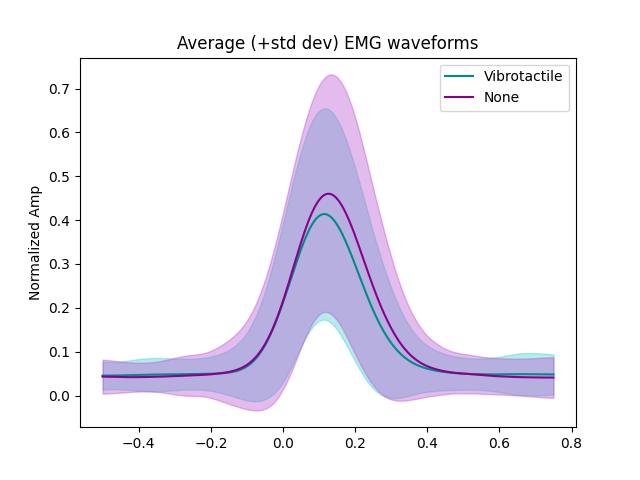

In [7]:
x_axis = np.arange(-2000, 3000)/4000

fig, ax = plt.subplots(1)
plt.plot(x_axis, np.mean(waveforms_haptics, axis=0), 'darkcyan', label='Vibrotactile')
plt.fill_between(x_axis, np.mean(waveforms_haptics, axis=0)-np.std(waveforms_haptics, axis=0), np.mean(waveforms_haptics, axis=0)+np.std(waveforms_haptics, axis=0), color='mediumturquoise', alpha=0.4)
plt.plot(x_axis, np.mean(waveforms_wo, axis=0), 'darkmagenta', label='None')
plt.fill_between(x_axis, np.mean(waveforms_wo, axis=0)-np.std(waveforms_wo, axis=0), np.mean(waveforms_wo, axis=0)+np.std(waveforms_wo, axis=0), color='mediumorchid', alpha=0.4)
plt.legend()

plt.ylabel('Normalized Amp')
plt.title('Average (+std dev) EMG waveforms')

In [8]:
np.shape(waveforms_haptics)

(2024, 5000)

In [9]:
boxplot_data = np.concatenate((np.expand_dims(np.max(waveforms_wo, axis=1), axis=1)[:-1], np.expand_dims(np.max(waveforms_haptics, axis=1), axis=1)),axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2370e1e8ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2370e1e9060>,
 'boxes': [<matplotlib.lines.Line2D at 0x2370e19b3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2370e1e9600>,
 'fliers': [<matplotlib.lines.Line2D at 0x2370e1e98d0>,
 'means': []}

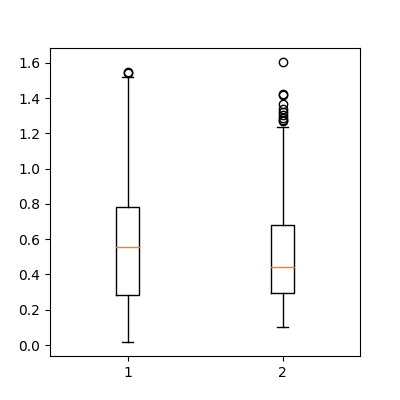

In [10]:
fig, ax = plt.subplots(1,figsize=(4,4))
plt.boxplot(boxplot_data)

In [11]:

max_amp = pd.DataFrame(boxplot_data, columns=['None', 'Vibro'])
print(max_amp)

          None     Vibro
0     0.519505  0.733193
1     0.707701  0.873453
2     0.691613  0.978836
3     0.815768  0.862375
4     0.771460  0.735503
...        ...       ...
2019  0.183915  0.186014
2020  0.206912  0.233389
2021  0.201387  0.203293
2022  0.266437  0.193444
2023  0.253265  0.261378

[2024 rows x 2 columns]


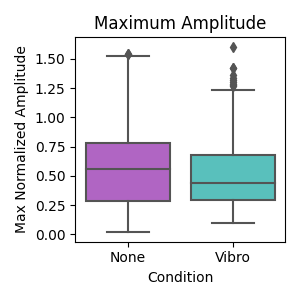

In [12]:
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
fig, ax = plt.subplots(1, figsize=(3, 3))
sns.boxplot(data=max_amp, palette=my_pal) 
plt.ylabel('Max Normalized Amplitude')
plt.xlabel('Condition')
plt.title("Maximum Amplitude")
plt.tight_layout()
plt.show()

In [13]:
stats.ttest_ind(np.max(waveforms_wo, axis=1)[:-1], np.max(waveforms_haptics, axis=1))

Ttest_indResult(statistic=6.222578817248373, pvalue=5.387363556465307e-10)

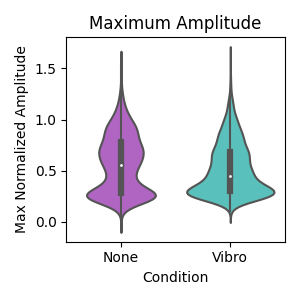

In [14]:
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
fig, ax = plt.subplots(1, figsize=(3, 3))
sns.violinplot(data=max_amp, palette=my_pal) 
plt.ylabel('Max Normalized Amplitude')
plt.xlabel('Condition')
plt.title("Maximum Amplitude")
plt.tight_layout()
plt.show()

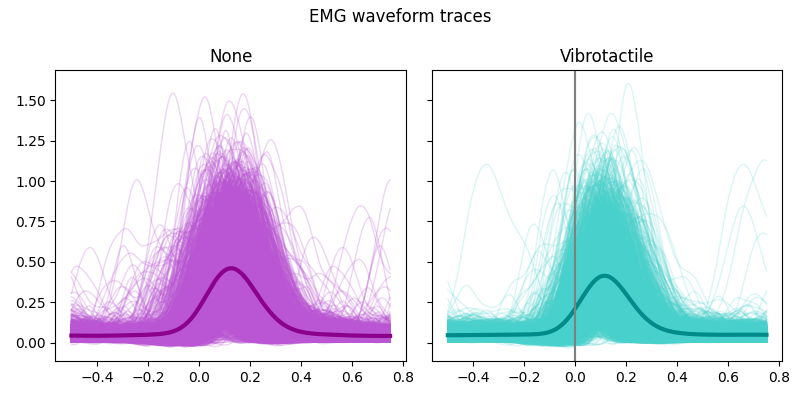

In [15]:
x_axis = (np.arange(5000) - 2000)/4000


fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# print(np.shape(np.mean(waveforms, axis=0)))
ax[0].set_title('None')
ax[0].plot(x_axis, waveforms_wo.T, alpha=0.25, lw=1, color='mediumorchid')
ax[0].plot(x_axis, np.mean(waveforms_wo, axis=0), color ='darkmagenta', lw=3)

 
plt.axvline(x = 0, color='grey')


# print(np.shape(np.mean(waveforms, axis=0)))
ax[1].plot(x_axis, waveforms_haptics.T, alpha=0.2, lw=1, color='mediumturquoise')
ax[1].plot(x_axis, np.mean(waveforms_haptics, axis=0), color ='darkcyan', lw=3)
ax[1].set_title('Vibrotactile')

plt.axvline(x = 0, color='grey')
plt.suptitle('EMG waveform traces')
plt.tight_layout()

In [16]:
rt_wo_df = pd.DataFrame(np.vstack((ID_wo, rt_wo)).T, columns=['ID', 'ReactionTime'])
rt_wo_df['Condition'] = 'None'

rt_haptics_df = pd.DataFrame(np.vstack((ID_haptics, rt_haptics)).T, columns=['ID', 'ReactionTime'])
rt_haptics_df['Condition'] = 'Vibro'

NameError: name 'rt_wo' is not defined

In [ ]:
merged_df_rt = pd.concat([rt_wo_df,rt_haptics_df], ignore_index=True)
print(merged_df_rt)

In [ ]:
merged_df_rt.ID = merged_df_rt.ID.round(1)

In [ ]:
# merged_df_rt['ReactionTime'][merged_df_rt['ReactionTime'] > 1000] = np.nan

In [ ]:
merged_df_rt.loc[merged_df_rt['ReactionTime']>0.5,['ReactionTime']] = np.nan
merged_df_rt.loc[merged_df_rt['ReactionTime']<-0.5,['ReactionTime']] = np.nan

In [ ]:
merged_df_rt_no_nan = merged_df_rt[merged_df_rt['ReactionTime'].notna()]

In [ ]:
#perform two-way ANOVA
model = ols('ReactionTime ~ C(Condition) + C(ID) + C(Condition):C(ID)', data=merged_df_rt_no_nan).fit()
sm.stats.anova_lm(model, typ=2)

In [ ]:
# perform Tukey's test
tukey_ID = pairwise_tukeyhsd(endog=merged_df_rt_no_nan['ReactionTime'],
                          groups=merged_df_rt_no_nan['ID'],
                          alpha=0.05)

#display results
print(tukey_ID)

# perform Tukey's test
tukey_condition = pairwise_tukeyhsd(endog=merged_df_rt_no_nan['ReactionTime'],
                          groups=merged_df_rt_no_nan['Condition'],
                          alpha=0.05)

#display results
print(tukey_condition)

In [ ]:
ID_concat = merged_df_rt['ID'].values
print(ID_concat)

In [ ]:
ID_rank = np.empty(np.shape(ID_concat))

for idx, unique in enumerate(np.unique(ID_concat)):
    indexes = np.argwhere(ID_concat == unique)
    ID_rank[indexes] = idx

In [ ]:
print(np.shape(ID_rank))

In [ ]:
ID_rank_shift = np.concatenate((ID_rank[:2025]-0.2, ID_rank[2025:]+0.2))

In [ ]:
plt.figure(figsize=(8,5))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.boxplot(x="ID", y="ReactionTime", hue="Condition", data=merged_df_rt, boxprops=dict(alpha=.45), palette=my_pal)  
sns.scatterplot(x = ID_rank_shift, y="ReactionTime", hue="Condition", data=merged_df_rt,alpha=0.65, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Fit of Reaction Time based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylim([-0.4, 0.4])
plt.show()

In [ ]:
print(np.unique(ID_rank_shift))

In [ ]:
plt.figure(figsize=(8,5))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.barplot(x="ID", y="ReactionTime", hue="Condition", data=merged_df_rt, palette=my_pal)  
sns.scatterplot(x = ID_rank_shift, y="ReactionTime", hue="Condition", data=merged_df_rt,alpha=0.4, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axhspan(0, .230, xmin=0.04, xmax=0.134, color = 'grey', alpha=0.4, lw=0)
plt.axhspan(0, .060, xmin=0.87, xmax=0.96, color = 'grey', alpha=0.4, lw=0)
plt.axhspan(0, .060, xmin=0.76, xmax=0.86, color = 'grey', alpha=0.4, lw=0)
plt.axhspan(0, .060, xmin=0.66, xmax=0.75, color = 'grey', alpha=0.4, lw=0)
plt.axhspan(0, .150, xmin=0.555, xmax=0.65, color = 'grey', alpha=0.4, lw=0)
plt.axhspan(0, .150, xmin=0.455, xmax=0.545, color = 'grey', alpha=0.4, lw=0)
plt.axhspan(0, .230, xmin=0.35, xmax=0.445, color = 'grey', alpha=0.4, lw=0)
plt.axhspan(0, .230, xmin=0.247, xmax=0.34, color = 'grey', alpha=0.4, lw=0)
plt.axhspan(0, .150, xmin=0.144, xmax=0.237, color = 'grey', alpha=0.4, lw=0)
plt.title('Fit of Reaction Time based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Reaction Time (sec')
# plt.ylim([-0.4, 0.4])
plt.show()

In [ ]:
plt.figure(figsize=(9,4))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.violinplot(x="ID", y="ReactionTime", hue="Condition", data=merged_df_rt, alpha=0.5, palette=my_pal) 
plt.setp(ax.collections, alpha=.5)
# sns.scatterplot(x = ID_rank_shift, y="ReactionTime", hue="Condition", data=merged_df_rt,alpha=0.45, palette=my_pal)
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.title('Fit of reaction time based on ID')
plt.xlabel('Index of difficulty (bits)')
from matplotlib.ticker import StrMethodFormatter
plt.axhline(y=0, color='gray')

plt.show()

In [ ]:
merged_df_rt.groupby('Condition').describe()

In [ ]:
merged_df_rt_low = merged_df_rt[~np.logical_or.reduce([merged_df_rt.ID ==4.7, merged_df_rt.ID ==5.2, merged_df_rt.ID ==4.1])]


In [ ]:
merged_df_rt_low.groupby('Condition').describe()

In [ ]:
plt.figure(figsize=(4,4))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.barplot(x="Condition", y="ReactionTime", data=merged_df_rt,  palette=my_pal)  
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axhline(y=0, color='gray')
plt.title('Fit of Reaction Time based on Condition')
plt.xlabel('Condition')
plt.ylabel('Reaction Time (s)')
# plt.ylim([-0.4, 0.4])
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
x = np.arange(0,9)
my_pal = {"None": "mediumorchid", "Vibro": "mediumturquoise"}
ax = sns.boxplot(x="Condition", y="ReactionTime", data=merged_df_rt, boxprops=dict(alpha=.45), palette=my_pal)  
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.axhline(y=0, color='gray')
plt.title('Fit of Reaction Time based on Condition')
plt.xlabel('Condition')
plt.ylabel('Reaction Time (s)')
# plt.ylim([-0.4, 0.4])
plt.tight_layout()
plt.show()

In [ ]:
rt_haptics_np = rt_haptics_df.values
rt_wo_np = rt_wo_df.values

fig, ax = plt.subplots(3, 3, figsize=(8, 8), sharex=True, sharey=True)
ax = ax.flatten()
ID_ordered = np.sort(rt_haptics_df['ID'].unique())
for idx, the_ID in enumerate(ID_ordered):

    # print(the_ID)
    idx_haptics = np.argwhere(the_ID == rt_haptics_df['ID'].values)

    idx_wo = np.argwhere(the_ID == rt_wo_df['ID'].values)

    target_size = gui_width[idx]
    
    hist_haptics = rt_haptics_np[idx_haptics, 1].squeeze()

    hist_haptics = hist_haptics[ (hist_haptics >= -0.5) & (hist_haptics <= 0.5) ]
    # print(hist_haptics)

    hist_wo = rt_wo_np[idx_wo, 1].squeeze()
    hist_wo = hist_wo[ (hist_wo >= -0.5) & (hist_wo <= 0.5) ]


    bins = np.histogram(np.hstack((hist_haptics, hist_wo)), bins=15)[1]


    
    ax[idx].hist(hist_haptics, bins=bins, alpha=0.5, label='Vibrotactile', color='mediumturquoise')
    ax[idx].hist(hist_wo, bins=bins, alpha=0.5, label='None', color='mediumorchid')

    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].axvspan(0, target_size/1000, alpha=0.5, color='grey', label='Target', lw=0)
    ax[idx].set_title(round(the_ID, 2))
    if idx % 3 == 0:  
        ax[idx].set_ylabel('Occurances')

handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Reaction time')
fig.text(0.5, 0.0, 'Time (s)', ha='center', va='center')
plt.tight_layout()

plt.savefig('reaction_time_ID_combined.png', dpi=500, bbox_inches="tight")
plt.show()
    

In [ ]:
ID_ordered

In [ ]:
ID_haptics

In [ ]:
fig, ax = plt.subplots(9, 3, figsize=(8, 18), sharex=True, sharey=True)
ax = ax.flatten()
x_range = np.arange(gui_reps_haptics)
print(x_range)
# ID_ordered = np.sort(ID_haptics)
for idx, the_ID in enumerate(ID_haptics):
    # print(idx)
    target_size = gui_combos_haptics[idx,0]
    print((idx+1)*gui_reps_haptics-1)
    scatter1 = threshold_distance_timestamp_haptics[idx*gui_reps_haptics:(idx+1)*gui_reps_haptics]
    # print(scatter1)
    ax[idx].scatter(x_range, scatter1)


    ax[idx].spines['top'].set_visible(False)
    ax[idx].spines['right'].set_visible(False)
    ax[idx].axhspan(0, target_size/1000, alpha=0.5, color='grey', label='Target', lw=0)
    ax[idx].set_title(round(the_ID, 2))
    if idx % 3 == 0:  
        ax[idx].set_ylabel('Reaction Time (s)')

handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Reaction time')
fig.text(0.5, 0.0, 'Trials', ha='center', va='center')
plt.tight_layout()

# plt.savefig('reaction_time_ID_kriti.png', dpi=500, bbox_inches="tight")
plt.show()

In [ ]:
fig, ax = plt.subplots(9, 3, figsize=(8, 18), sharex=True, sharey=True)
ax = ax.flatten()
ID_ordered = np.sort(ID_haptics)
x_range = np.arange(gui_reps_haptics)
print(x_range)
# ID_ordered = np.sort(ID_haptics)
for idx, the_ID in enumerate(ID_ordered[::3]):
    # print(idx)
    # print(the_ID)
    idx_haptics = np.argwhere(the_ID == ID_haptics)
    idx_wo = np.argwhere(the_ID == ID_wo)

    target_size = gui_combos_haptics[idx_haptics[0][0],0]
    scatter1 = threshold_distance_timestamp_haptics[idx*gui_reps_haptics:(idx+1)*gui_reps_haptics]
    # print(scatter1)

    scatter1 = threshold_distance_timestamp_haptics[idx_haptics[0][0]*gui_reps_haptics:(idx_haptics[0][0]+1)*gui_reps_haptics]
    scatter2 = threshold_distance_timestamp_haptics[idx_haptics[1][0]*gui_reps_haptics:(idx_haptics[1][0]+1)*gui_reps_haptics]
    scatter3 = threshold_distance_timestamp_haptics[idx_haptics[2][0]*gui_reps_haptics:(idx_haptics[2][0]+1)*gui_reps_haptics]

    scatter1_wo = threshold_distance_timestamp_wo[idx_wo[0][0]*gui_reps_haptics:(idx_wo[0][0]+1)*gui_reps_haptics] 
    scatter2_wo = threshold_distance_timestamp_wo[idx_wo[1][0]*gui_reps_haptics:(idx_wo[1][0]+1)*gui_reps_haptics]
    scatter3_wo =threshold_distance_timestamp_wo[idx_wo[2][0]*gui_reps_haptics:(idx_wo[2][0]+1)*gui_reps_haptics]
    

    ax[idx*3].scatter(x_range, scatter1, color='mediumturquoise', label='Vibro', alpha=0.5, s=20)
    ax[idx*3+1].scatter(x_range, scatter2, color='mediumturquoise', label='Vibro', alpha=0.5, s=20)
    ax[idx*3+2].scatter(x_range, scatter3, color='mediumturquoise', label='Vibro', alpha=0.5, s=20)

    ax[idx*3].scatter(x_range, scatter1_wo, color='mediumorchid', label='None', alpha=0.5, s=20)
    ax[idx*3+1].scatter(x_range, scatter2_wo, color='mediumorchid', label='None', alpha=0.5, s=20)
    ax[idx*3+2].scatter(x_range, scatter3_wo, color='mediumorchid', label='None', alpha=0.5, s=20)


    ax[idx*3].spines['top'].set_visible(False)
    ax[idx*3+1].spines['top'].set_visible(False)
    ax[idx*3+2].spines['top'].set_visible(False)
    ax[idx*3].spines['right'].set_visible(False)
    ax[idx*3+1].spines['right'].set_visible(False)
    ax[idx*3+2].spines['right'].set_visible(False)

    ax[idx*3].axhspan(0, target_size/1000, alpha=0.4, color='grey', label='Target', lw=0)
    ax[idx*3].set_title(round(the_ID, 2))
    ax[idx*3+1].axhspan(0, target_size/1000, alpha=0.4, color='grey', label='Target', lw=0)
    ax[idx*3+1].set_title(round(the_ID, 2))
    ax[idx*3+2].axhspan(0, target_size/1000, alpha=0.4, color='grey', label='Target', lw=0)
    ax[idx*3+2].set_title(round(the_ID, 2))

  
    ax[idx*3].set_ylabel('Reaction Time (s)')

ax[idx].set_xlabel('Trials')
handles, labels = ax[8].get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
fig.legend(*zip(*unique), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.suptitle('Reaction time')
fig.text(0.5, 0.0, 'Trials', ha='center', va='center')
plt.tight_layout()

plt.savefig('reaction_time_ID_learning_kriti.png', dpi=500, bbox_inches="tight")
plt.show()

In [ ]:
mu_wo = np.mean(threshold_distance_timestamp_wo_nan)
sigma_wo = np.std(threshold_distance_timestamp_wo_nan)
n_bins_wo = 50

fig, ax = plt.subplots(2, figsize=(6, 5), sharex=True, sharey=True)

# plot the cumulative histogram
n_wo, bins_wo, patches_wo = ax[0].hist(threshold_distance_timestamp_wo_nan, n_bins_wo, density=1, histtype='step',
                           cumulative=True, label='Empirical - No haptics', color='mediumorchid', linewidth=2)

# Add a line showing the expected distribution.
y = stats.norm.pdf(bins_wo, mu_wo, sigma_wo).cumsum()
y /= y[-1]

ax[0].plot(bins_wo, y, 'k--', linewidth=1.5, label='Theoretical')


ax[0].grid(True)
ax[0].legend(loc='right')
ax[0].set_title('Cummulative reaction time fit to gaussian')
ax[0].set_ylabel('Likelihood of occurrence')



## Haptics
mu_haptics = np.mean(threshold_distance_timestamp_haptics_nan)
sigma_haptics = np.std(threshold_distance_timestamp_haptics_nan)
n_bins_haptics = 50

# plot the cumulative histogram
n_haptics, bins_haptics, patches_haptics = ax[1].hist(threshold_distance_timestamp_haptics_nan, n_bins_haptics, density=1, histtype='step',
                           cumulative=True, label='Empirical - Vibrotactile', color='mediumturquoise', linewidth=2)

# Add a line showing the expected distribution.
y = stats.norm.pdf(bins_haptics, mu_haptics, sigma_haptics).cumsum()
y /= y[-1]

ax[1].plot(bins_haptics, y, 'k--', linewidth=1.5, label='Theoretical')


ax[1].grid(True)
ax[1].legend(loc='right')
ax[1].set_xlabel('Reaction time (sec)')
ax[1].set_ylabel('Likelihood of occurrence')

plt.tight_layout()

plt.show()

In [ ]:
repitions = gui_reps_haptics
print("repitions:", repitions)
correct_timestamp_haptics = correct_timestamp_haptics[:-1]
level = np.arange(len(correct_timestamp_haptics))//repitions
print('Levels:', level)




performance_haptics = np.bincount(level,correct_timestamp_haptics)/np.bincount(level)
print('performance per level:', performance_haptics)
np.savetxt('kriti_haptics.txt', performance_haptics)
np.savetxt('kriti_ID_haptics.txt', ID_haptics)

In [ ]:

repitions = gui_reps_wo
print("repitions:", repitions)
correct_timestamp_wo = correct_timestamp_wo[:-1]
level = np.arange(len(correct_timestamp_wo))//repitions
print('Levels:', level)




performance_wo = np.bincount(level,correct_timestamp_wo)/np.bincount(level)
print('performance per level:', performance_wo)
np.savetxt('kriti_wo.txt', performance_wo)
np.savetxt('kriti_ID_wo.txt', ID_wo)

In [ ]:
coef = np.polyfit(ID_haptics,1-performance_haptics,1)
ID_fit_haptics = np.poly1d(coef) 
r_value_haptics = stats.linregress(ID_haptics,1-performance_haptics)[2]
print(r_value_haptics)

coef = np.polyfit(ID_wo,1-performance_wo,1)
ID_fit_wo = np.poly1d(coef) 
r_value_wo = stats.linregress(ID_wo,1-performance_wo)[2]
print(r_value_wo)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.figure(figsize=(5,4))
plt.scatter(ID_haptics, 1-performance_haptics, alpha=0.6, label='Vibrotactile', color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(ID_haptics, ID_fit_haptics(ID_haptics), color='darkcyan', label=label_str_haptics) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.scatter(ID_wo, 1-performance_wo, alpha=0.6, label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(ID_wo, ID_fit_wo(ID_wo), color='darkmagenta', label=label_string_wo) #'--k'=black dashed line, 'yo' = yellow circle marker

plt.title('Fit of error rate based on ID')
plt.xlabel('Index of difficulty (bits)')
plt.ylabel('Error rate')

plt.legend()
# plt.xlim([0, 4])
plt.ylim([0, 1.05])
plt.tight_layout()
plt.savefig('errorrate_ID_kriti.png', dpi=500, bbox_inches="tight")
plt.show()

In [ ]:

dt_coef_haptics = np.polyfit(gui_combos_haptics[:,1],1-performance_haptics,1)
print(dt_coef_haptics)
dt_fn_haptics = np.poly1d(dt_coef_haptics) 
r_value_haptics = stats.linregress(gui_combos_haptics[:,1],1-performance_haptics)[2]
print(r_value_haptics)


dt_coef_wo = np.polyfit(gui_combos_wo[:,1],1-performance_wo,1)
print(dt_coef_wo)
dt_fn_wo = np.poly1d(dt_coef_wo) 
r_value_wo = stats.linregress(gui_combos_wo[:,1],1-performance_wo)[2]
print(r_value_wo) 

plt.figure(figsize=(5,4))
plt.scatter(gui_combos_haptics[:,1], 1-performance_haptics[0:np.shape(ID_haptics)[0]], alpha=0.5, label="Vibrotactile", color='mediumturquoise')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(gui_combos_haptics[:, 1][0:3], dt_fn_haptics(gui_combos_haptics[:, 1][0:3]), color='darkcyan', label=label_str_haptics)


plt.scatter(gui_combos_wo[:,1], 1-performance_wo[0:np.shape(ID_wo)[0]], alpha=0.5,  label="None", color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(gui_combos_wo[:, 1][0:3], dt_fn_wo(gui_combos_wo[:, 1][0:3]),color='darkmagenta', label=label_string_wo)


plt.title('Fit of error rate based on target distance')
plt.xlabel('$D_{t}$ - Temporal Distance (ms)')
plt.ylabel('Error rate')
plt.ylim([0, 1.05])
plt.legend()
plt.tight_layout()
plt.savefig('errorrate_distance_kriti.png', dpi=500, bbox_inches="tight")
plt.show()

In [ ]:
wt_coef_wo = np.polyfit(gui_combos_wo[:,0],1-performance_wo,1)
print(wt_coef_wo)
wt_wo = np.poly1d(wt_coef_wo)
r_value_wo = stats.linregress(gui_combos_wo[:,0],1-performance_wo)[2]
print(r_value_wo) 

wt_coef_haptics = np.polyfit(gui_combos_haptics[:,0],1-performance_haptics,1)
print(wt_coef_haptics)
wt_haptics = np.poly1d(wt_coef_haptics) 
r_value_haptics = stats.linregress(gui_combos_haptics[:,0],1-performance_haptics)[2]
print(r_value_haptics)

plt.figure(figsize=(5,4))
plt.scatter(gui_combos_haptics[:,0], 1-performance_haptics[0:np.shape(ID_haptics)[0]], alpha=0.5, color='mediumturquoise', label='Vibrotactile')
label_str_haptics = r'$R^{}$ = {}'.format(2, round(r_value_haptics**2,2)) 
plt.plot(gui_combos_haptics[:, 0][0:-1:3], wt_haptics(gui_combos_haptics[:, 0][0:-1:3]), color='darkcyan', label=label_str_haptics)

plt.scatter(gui_combos_wo[:,0], 1-performance_wo[0:np.shape(ID_wo)[0]], alpha=0.5,  label='None', color='mediumorchid')
label_string_wo = r'$R^{}$ = {}'.format(2, round(r_value_wo**2,2)) 
plt.plot(gui_combos_wo[:, 0][0:-1:3], wt_wo(gui_combos_wo[:, 0][0:-1:3]),color='darkmagenta', label=label_string_wo)

plt.title('Fit of error rate based on target width')
plt.xlabel('$W_{t}$ - Target Width (ms)')
plt.ylabel('Error rate')
plt.ylim([0, 1.05])
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('errorrate_width_kriti.png', dpi=500, bbox_inches="tight")

In [ ]:
np.shape(box_plot_data_wo)

In [ ]:
threshold_distance_timestamp_wo =threshold_distance_timestamp_wo[:-1]

In [ ]:
ID_wo

In [ ]:
ID_wo_rep = np.repeat(ID_wo, 25)
print(ID_wo_rep)

In [ ]:
np.unique(ID_wo_rep, return_index=True)[1][1:]

In [ ]:
np.unique(level, return_index=True)[1][1:]

In [ ]:
np.shape(box_plot_data_haptics)

In [ ]:
box_plot_data_haptics = np.split(threshold_distance_timestamp_haptics, np.unique(level, return_index=True)[1][1:])
bar_mean_haptics = np.nanmean(box_plot_data_haptics, axis=1)
print('Vibro mean:', bar_mean_haptics)
bar_std_haptics = np.nanstd(box_plot_data_haptics, axis=1)
print('Vibro std:', bar_std_haptics)

box_plot_data_wo = np.split(threshold_distance_timestamp_wo, np.unique(level, return_index=True)[1][1:])
bar_mean_wo = np.nanmean(box_plot_data_wo, axis=1)
print('None mean:', bar_mean_wo)
bar_std_wo = np.nanstd(box_plot_data_wo, axis=1)
print('None std:', bar_std_wo)

plt.figure(figsize=(8,3))
ax = plt.subplot(111)
w = 0.05
x= np.arange(np.shape(bar_mean_wo)[0])
ax.bar(ID_wo-w/2, bar_mean_wo, yerr=bar_std_wo, width=w, color='mediumorchid', align='center', label='None')
ax.bar(ID_haptics+w/2, bar_mean_haptics,yerr=bar_std_haptics, width=w, color='mediumturquoise', align='center', label='Vibrotactile')
plt.legend()
plt.title('Reaction time per ID')
plt.ylabel('Time (in seconds)')
plt.xlabel('Index of Difficulty (bits)')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.savefig('reactiontime_ID_kriti.png', dpi=500, bbox_inches="tight")
plt.show()